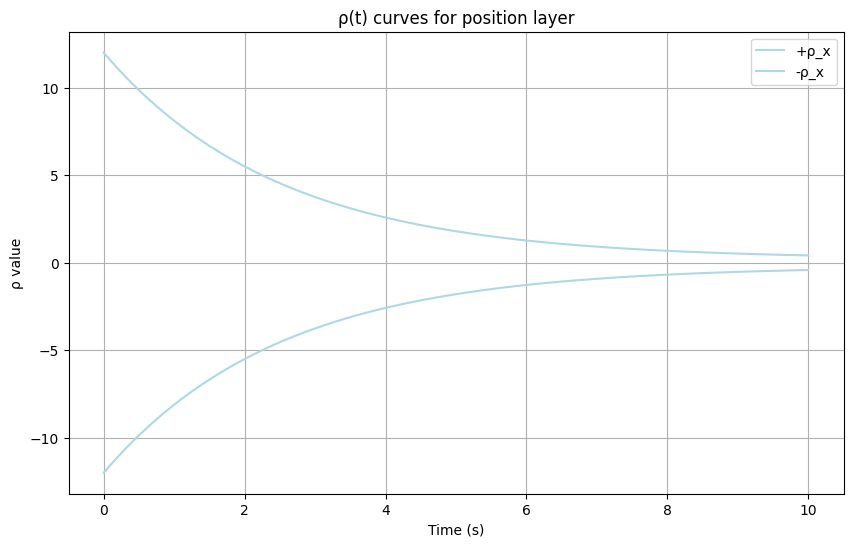

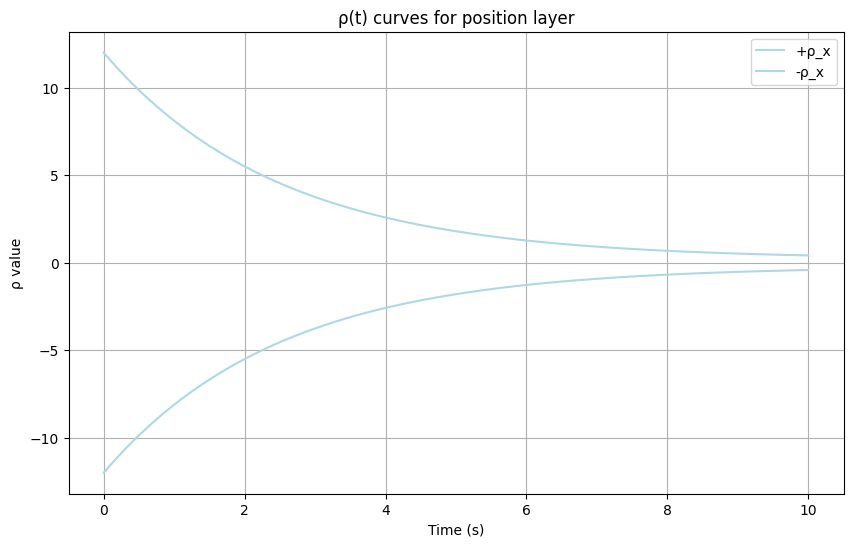

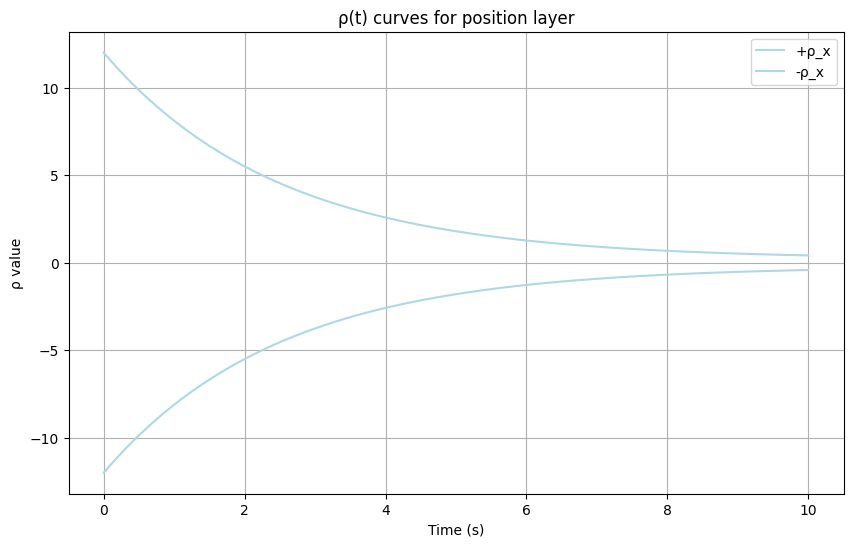

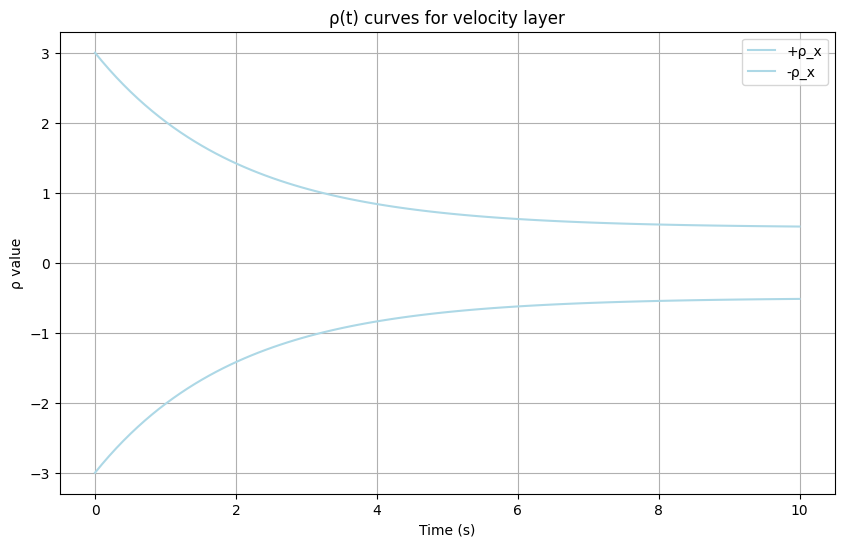

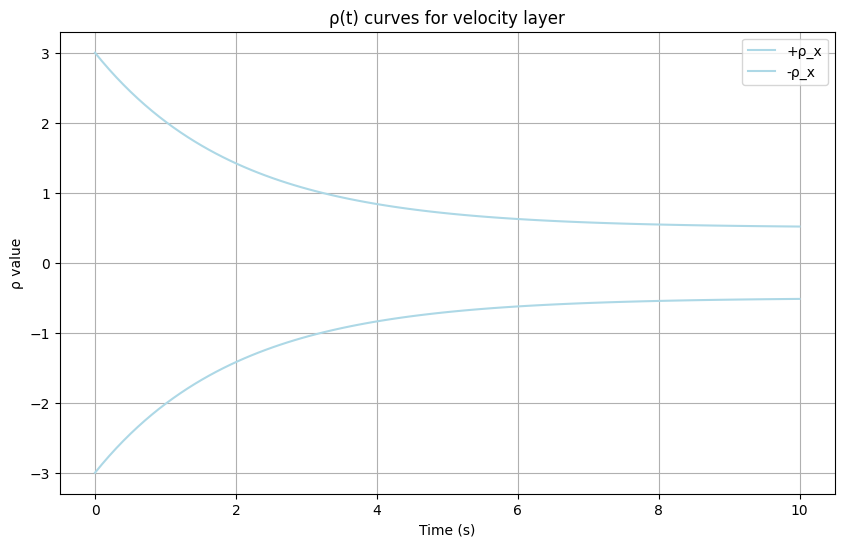

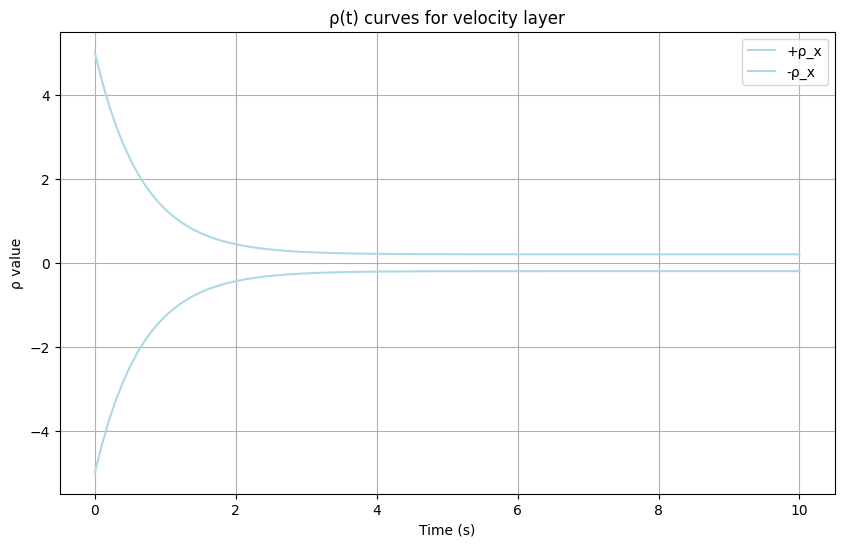

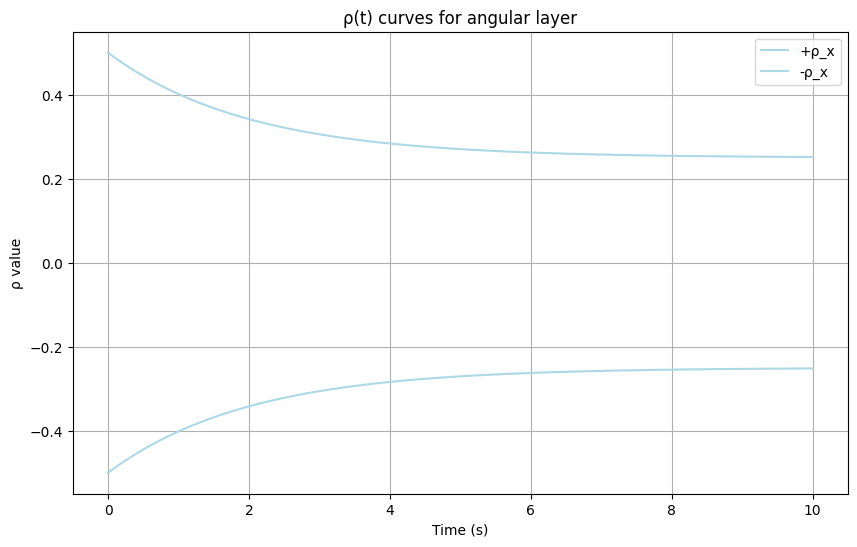

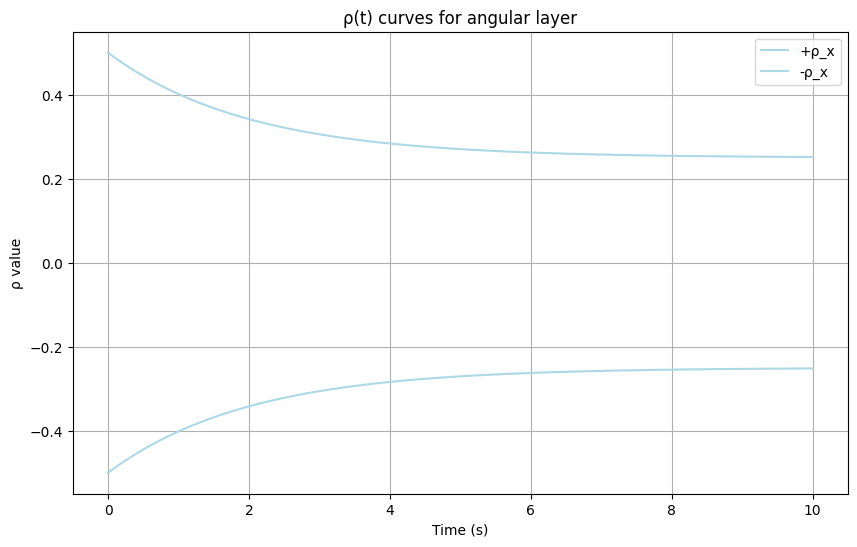

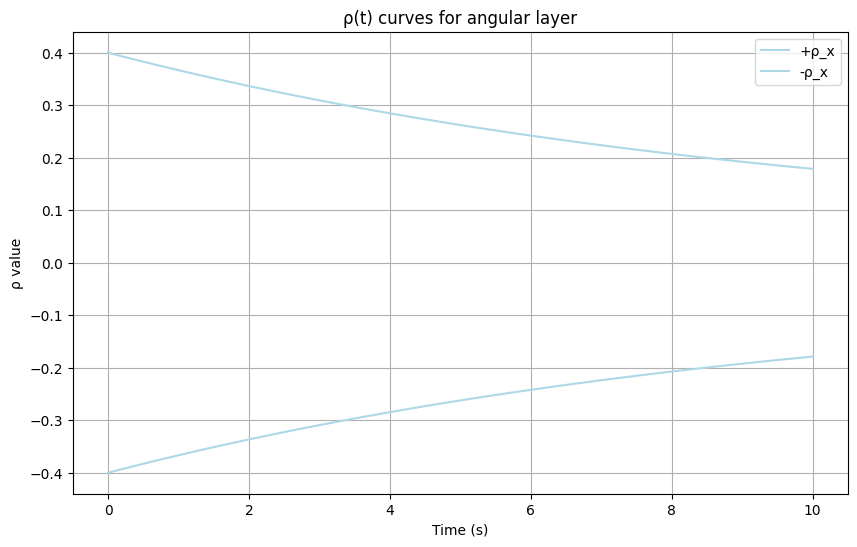

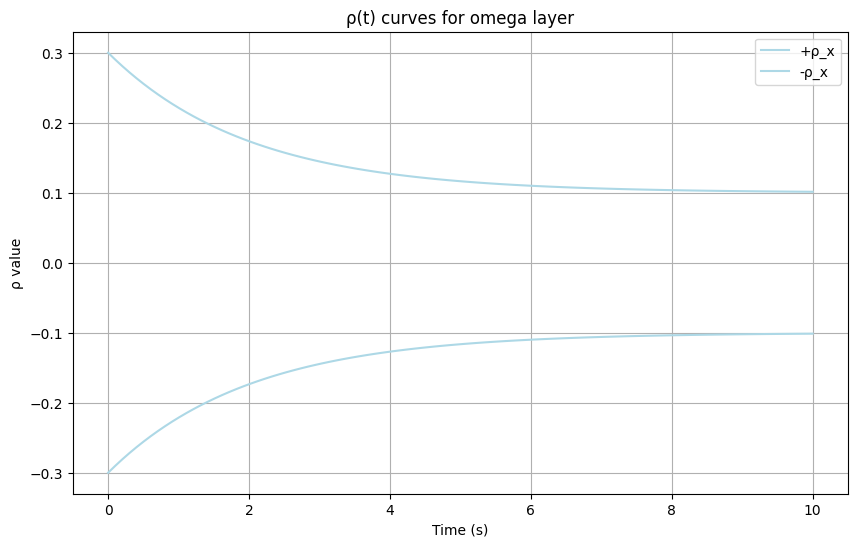

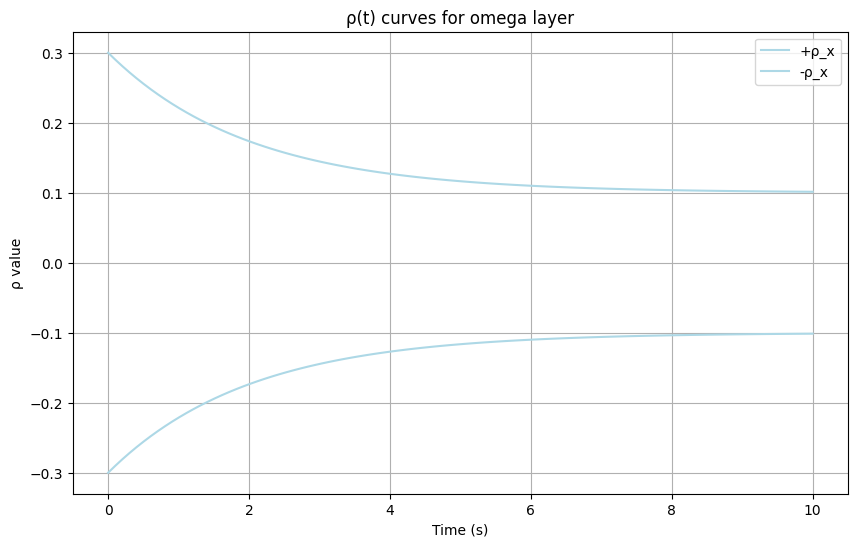

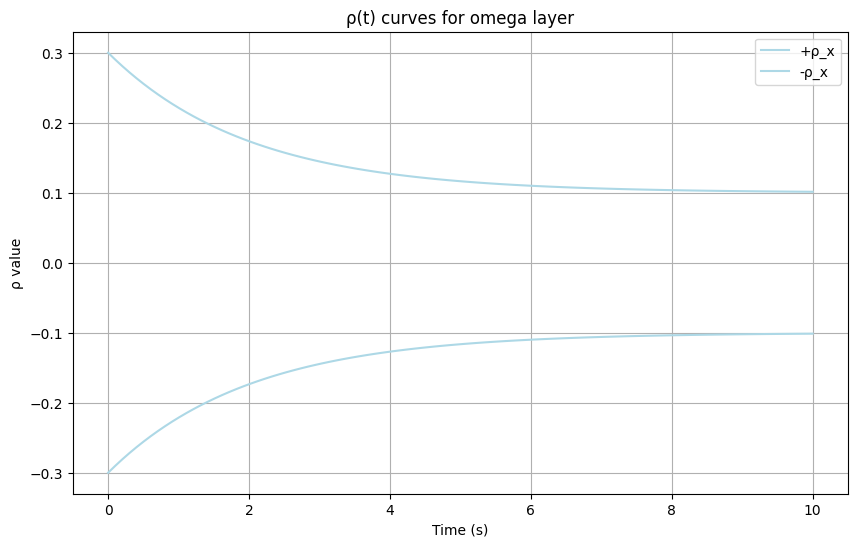

In [25]:
from px4_offboard_py.PPC_controller import PPCController
import numpy as np
import matplotlib.pyplot as plt

ppc = PPCController()
state = {
    'pos': np.array([0.0, 0.0, 0.0]),
    'vel': np.array([0.0, 0.0, 0.0]),
    'euler': np.array([0.0, 0.0, 0.0]),
    'omega': np.array([0.0, 0.0, 0.0]),
    'yaw': 0.0
}

t = 0
x = np.cos(t)/(1 + np.cos(t)**2)
y = np.sin(t) * x
z = 1 + t/5

target_pos = [x, y, z]
target_yaw = 0.0

rho_para = {
    'position': {
        'px': (12.0, 0.2, 0.4),
        'py': (12.0, 0.2, 0.4),
        'pz': (12.0, 0.2, 0.4)
    },
    'velocity': {
        'vx': (3.0, 0.5, 0.5),
        'vy': (3.0, 0.5, 0.5),
        'vz': (5.0, 0.2, 1.5)
    },
    'angular': {
        'phitheta1': (0.5, 0.25, 0.5),
        'phitheta2': (0.5, 0.25, 0.5),
        'psi': (0.4, 0.05, 0.1)
    },
    'omega': {
        'omega_phi': (0.3, 0.1, 0.5),
        'omega_theta': (0.3, 0.1, 0.5),
        'omega_psi': (0.3, 0.1, 0.5)
    }
}

# Gains from the simulation section in the paper
k = {
    'position': 1.25,      # kp in vr computation
    'velocity_x': 1,    
    'velocity_y': 2,
    'velocity_z': 1.0,     # kvz in Fz computation
    'angular1': 3.0,       # k_phi_theta1
    'angular2': 1.5,       # k_phi_theta2
    'angular3':1,
    'omega': 10.0,         # k_omega
}

t_check = np.linspace(0, 10, 100)
rho_values = {layer: {axis: [] for axis in axes} for layer, axes in rho_para.items()}
rho_values_pos = {layer: {axis: [] for axis in axes} for layer, axes in rho_para.items()}
rho_values_neg = {layer: {axis: [] for axis in axes} for layer, axes in rho_para.items()}

for t in t_check:
    for layer, axes in rho_para.items():
        for axis in axes:
            rho = ppc.rho_calculation(layer, axis, t)
            rho_values_pos[layer][axis].append(rho)
            rho_values_neg[layer][axis].append(-rho)


# Step 7: Plotting function per layer
def plot_rho_layer(layer, axes):
    plt.figure(figsize=(10,6))
    plt.plot(t_check, rho_values_pos[layer][axis], label='+ρ_x', color='lightblue')
    plt.plot(t_check, rho_values_neg[layer][axis], label='-ρ_x', color='lightblue')
    plt.title(f"ρ(t) curves for {layer} layer")
    plt.xlabel("Time (s)")
    plt.ylabel("ρ value")
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

# Step 8: Plot each layer separately
for layer, axes in rho_para.items():
    for axis in axes:
        plot_rho_layer(layer, axes)